# 필요 함수 정의

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

# 경향성이 있는 그래프의 선형적으로 증가할 수 있게 하는 함수 
def trend(time, slope = 0):
    return time * slope

# x: 시간축인 함수 plot 함수
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# 120개씩 자르는 함수 
def univariate_data(dataset, start_index, end_index):
    data = []
    history_size = 120
    start_index = start_index + history_size


    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(dataset[indices])

    return np.array(data)

group_idx : 1시간마다 자른 데이터의 평균을 정리한 데이터프레임, index : 716

df_idx_tmp : 하나의 구간의 모든 데이터를 가지고 있는 데이터프레임, index : 8592

df_temp_idx : temp 데이터만을 120개씩 잘라서 모아 놓은 데이터

## 10-15

In [3]:
for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:601800].reset_index().drop(columns = ['index'], axis = 0)

for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)


for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

N = 6
dx = (600 - df_1_tmp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_tmp)-1) # 분당 증가율

time = np.arange(85920)
slope = dx_minute * 2

def trend(time, slope = 0):
    return time * slope

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series


univariate_past_history = 120

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'Group' : [], 'batch_num' : [] }

    for j in range(716):
        MEAN = np.round(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].mean(),3)
        MIN = np.min(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        MAX = np.max(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        STD = np.std(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        data['Group'].append(i)
        data['batch_num'].append(j+1)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)

    globals()['group_'+str(i)] = pd.DataFrame(data)

TIME = pd.DataFrame({'TIME' : np.arange(7876)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = 'index', inplace = True)
df = tmp

for i in range(1,12):
    globals()['df_temp_'+str(i)] = univariate_data(globals()['df_'+str(i)+'_tmp']['TEMP'], 0, len(df_1_tmp)+1)

In [4]:
for i in range(1,12):
    data = globals()['df_'+str(i)+'_tmp']
    G = np.array([i] * len(data))
    GROUP = pd.DataFrame({'Group' : G})
    globals()['df_'+str(i)+'_tmp'] = pd.concat([data, GROUP], axis = 1)


In [5]:
df_7_tmp

,date,kst,TEMP,Group
0,20230629,9:14,574.443,7
1,20230629,9:14,574.364,7
2,20230629,9:15,574.566,7
3,20230629,9:15,574.407,7
4,20230629,9:16,574.023,7
...,...,...,...,...
85915,20230801,5:11,687.843,7
85916,20230801,5:12,687.748,7
85917,20230801,5:12,687.765,7
85918,20230801,5:13,687.182,7


In [6]:
df_temp_all = pd.concat([df_1_tmp, df_2_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_tmp], axis = 0)

df_temp_all = df_temp_all.reset_index().drop(columns='index', axis = 0)
df_temp_all


,date,kst,TEMP,Group
0,20230101,9:00,286.797,1
1,20230101,9:00,287.082,1
2,20230101,9:01,285.938,1
3,20230101,9:01,285.772,1
4,20230101,9:02,286.357,1
...,...,...,...,...
945115,20230629,9:11,933.812,11
945116,20230629,9:12,934.304,11
945117,20230629,9:12,934.530,11
945118,20230629,9:13,934.443,11


In [7]:
idx = np.arange(945120)
TIME = pd.DataFrame({'TIME': idx})
df_temp_all = pd.concat([df_temp_all, TIME], axis = 1)

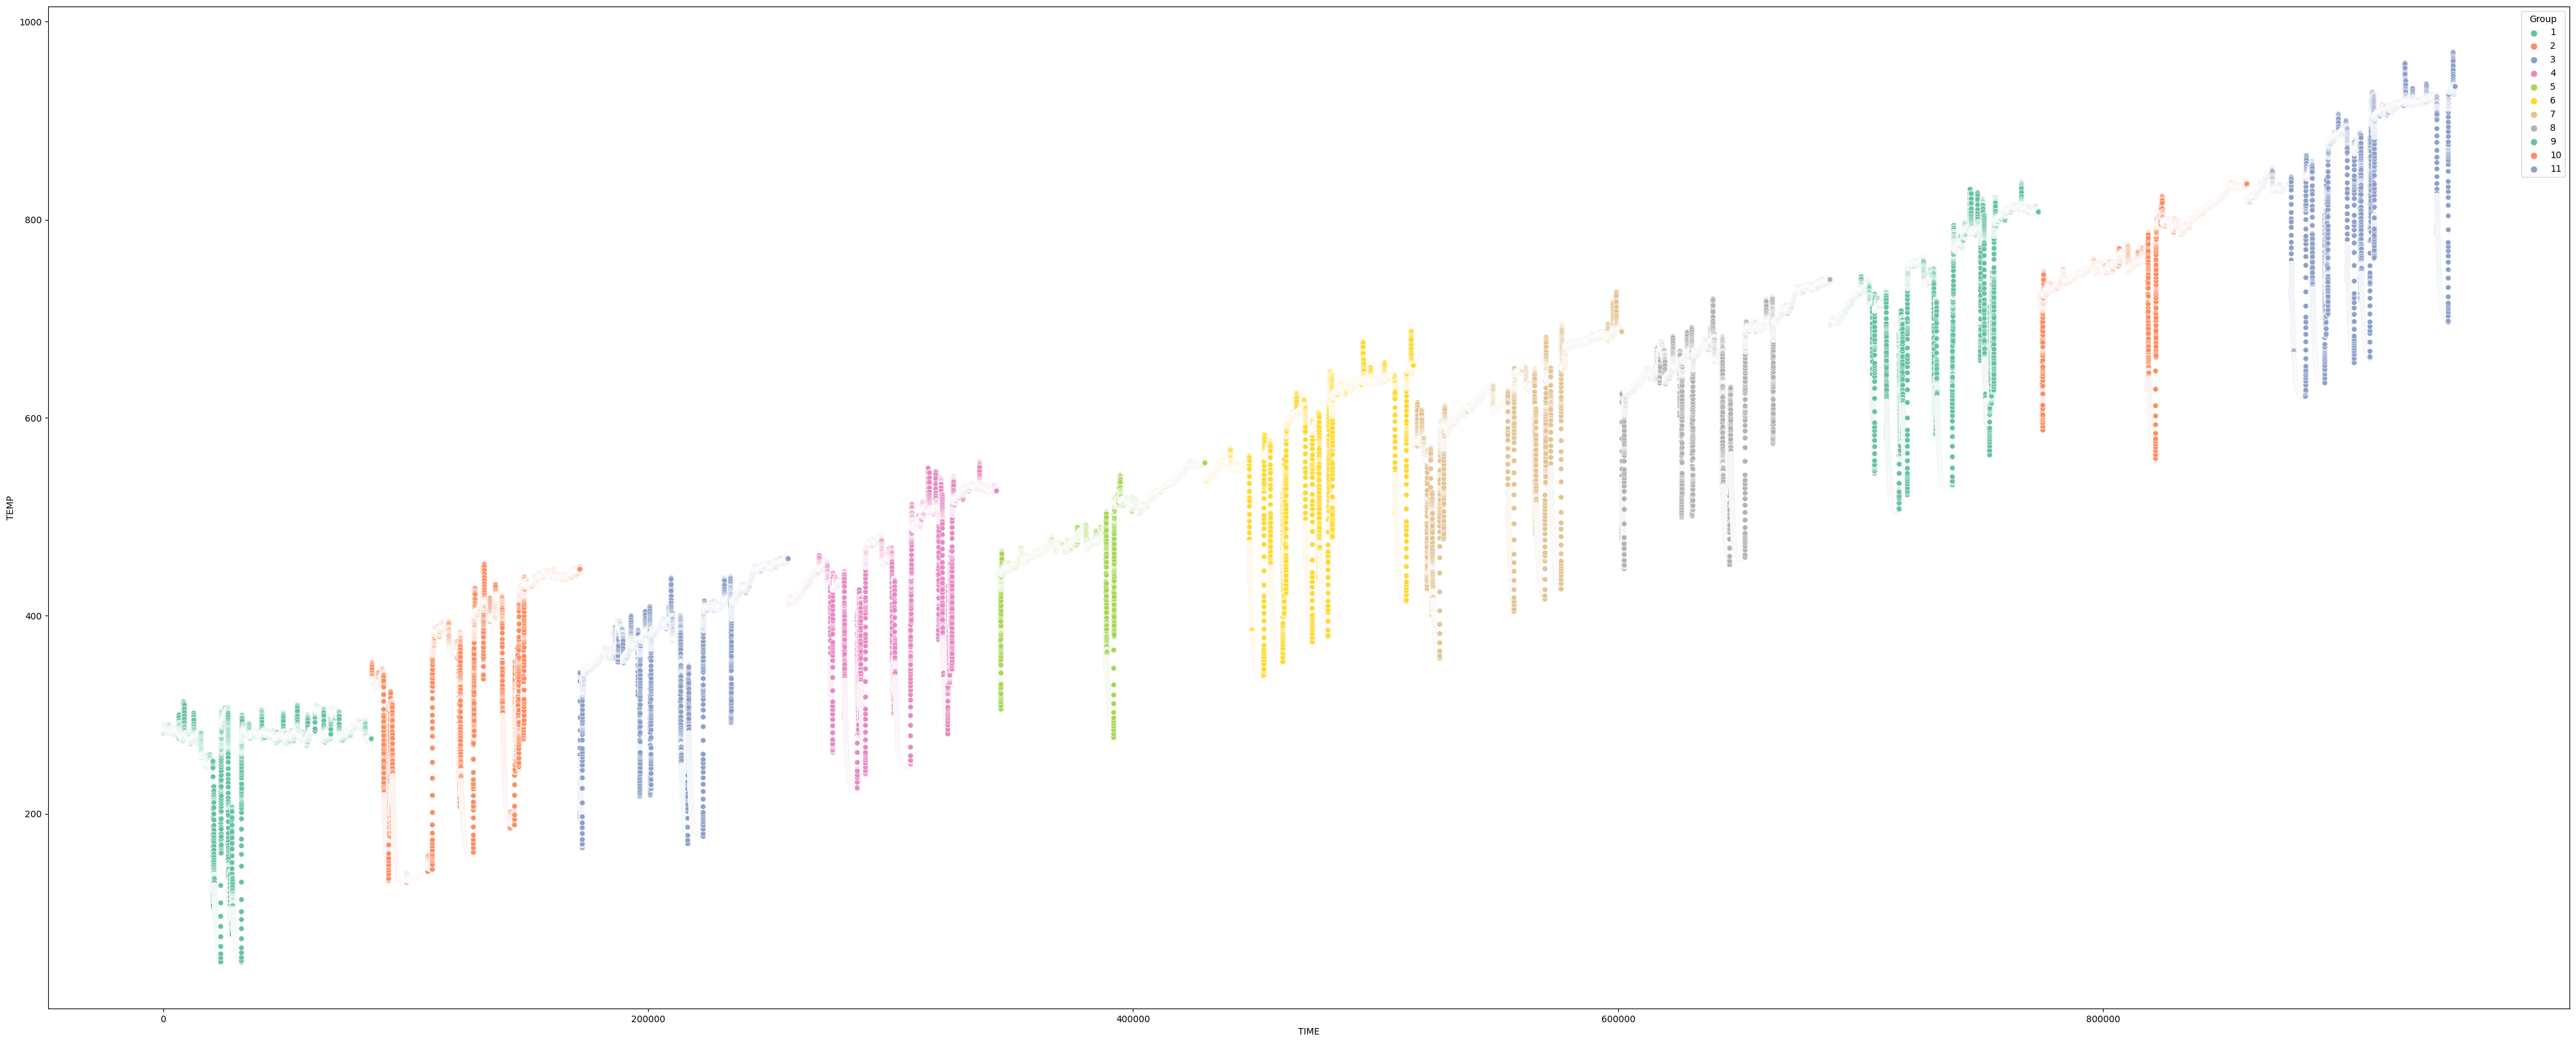

In [8]:
plt.figure(figsize = (50,20))
sns.scatterplot(data = df_temp_all, x = 'TIME', y = 'TEMP', hue='Group', palette = 'Set2')

plt.show()

In [9]:
idx = np.arange(601800)
TIME = pd.DataFrame({'TIME': idx})
df_all = pd.concat([df_all, TIME], axis = 1)
df_all

,date,kst,TEMP,TIME
0,20230101,9:00,286.797,0
1,20230101,9:00,287.082,1
2,20230101,9:01,285.938,2
3,20230101,9:01,285.772,3
4,20230101,9:02,286.357,4
...,...,...,...,...
601795,20230801,8:11,281.054,601795
601796,20230801,8:12,281.217,601796
601797,20230801,8:12,281.161,601797
601798,20230801,8:13,281.094,601798


In [10]:
df

,MEAN_TEMP,STD,MIN,MAX,Group,batch_num,TIME
0,284.192,1.275722,281.401,287.082,1,1,0
1,284.353,1.052731,281.236,286.949,1,2,1
2,285.276,1.043551,282.941,287.552,1,3,2
3,285.589,0.970639,283.867,288.153,1,4,3
4,285.146,1.074865,281.689,286.664,1,5,4
...,...,...,...,...,...,...,...
7871,931.874,2.127380,926.730,936.100,11,712,7871
7872,933.001,0.585021,931.564,934.166,11,713,7872
7873,933.236,0.659152,931.690,934.549,11,714,7873
7874,933.649,0.771575,932.209,935.319,11,715,7874


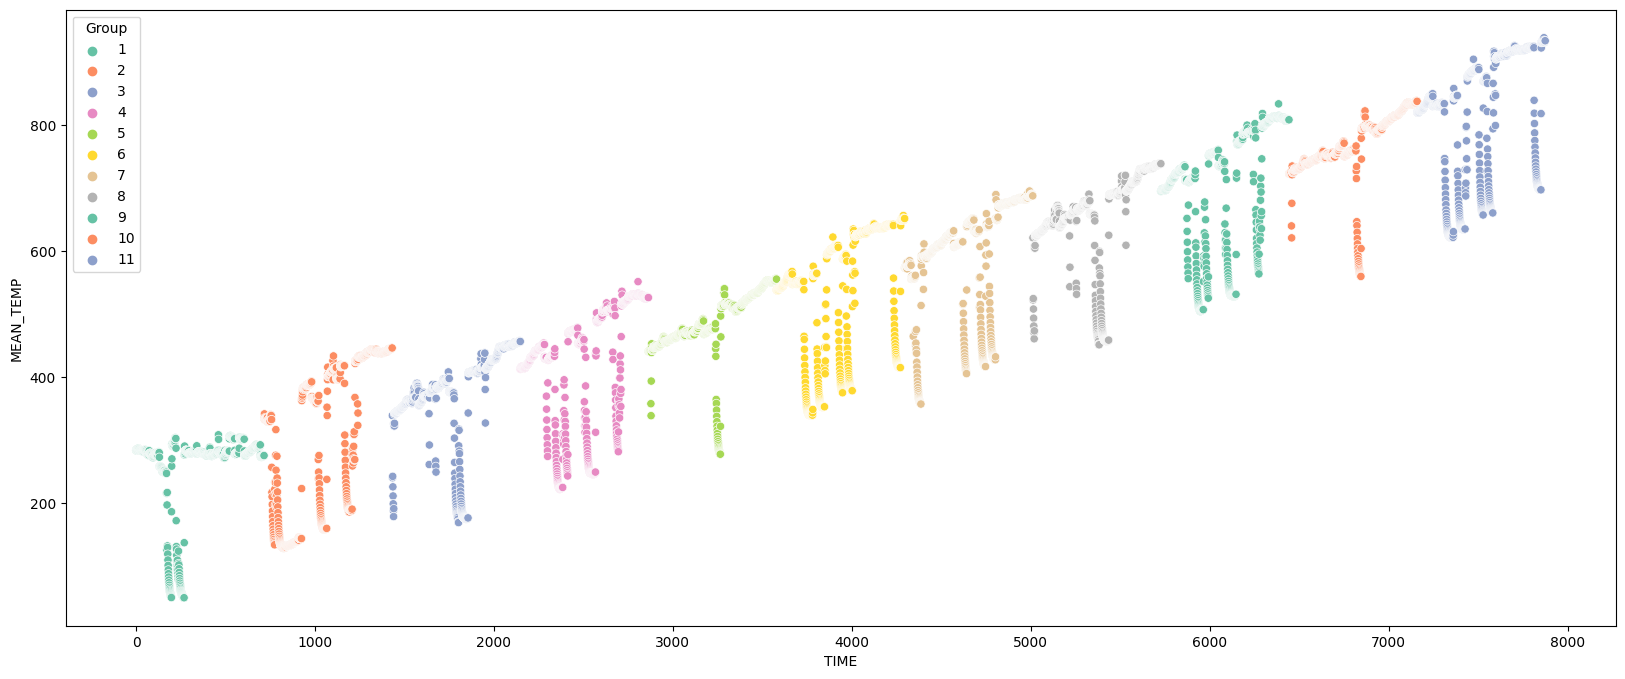

In [11]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = 'TIME', y = 'MEAN_TEMP', data = df, hue='Group', palette='Set2')
plt.show()

# Machine Learning 적용

In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, :4].values
X_mean = df['MEAN_TEMP'].values
y = df['Group'].values - 1
X_mean = X_mean.reshape(X_mean.shape[0], 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_mean_scale = scaler.fit_transform(X_mean)
e = LabelEncoder()
Y = e.fit_transform(y)
Y = tf.keras.utils.to_categorical(Y)
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size = 0.3, random_state = 96)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5513, 4) (2363, 4) (5513,) (2363,)


In [14]:
# scaler = MinMaxScaler()
# X_mean_scale = scaler.fit_transform(X_mean)

# X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size = 0.2, random_state = 96)
# print("X_train shape : ",X_train.shape, ", X_test shape :",X_test.shape, ", y_train shape : ,",y_train.shape, ", y_test shape : ",y_test.shape)

In [15]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators = 100)

lgbm.fit(X_train, y_train,
         eval_metric = 'logloss',
         eval_set = [(X_test, y_test)])
lgbm_predict = lgbm.predict(X_test)
print(accuracy_score(y_test, lgbm_predict))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 5513, number of used features: 4
[LightGBM] [Info] Start training from score -2.404264
[LightGBM] [Info] Start training from score -2.396264
[LightGBM] [Info] Start training from score -2.374588
[LightGBM] [Info] Start training from score -2.404264
[LightGBM] [Info] Start training from score -2.410306
[LightGBM] [Info] Start training from score -2.430715
[LightGBM] [Info] Start training from score -2.376540
[LightGBM] [Info] Start training from score -2.426600
[LightGBM] [Info] Start training from score -2.394274
[LightGBM] [Info] Start training from score -2.364889
[LightGBM] [Info] Start training from score -2.396264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.7109606432501058


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, knn_pred))

0.7181548878544224


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 96)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(accuracy_score(y_test, dtc_pred))


0.690224291155311


### Train, Test SPlit

In [18]:
group_1

,MEAN_TEMP,STD,MIN,MAX,Group,batch_num
0,284.192,1.275722,281.401,287.082,1,1
1,284.353,1.052731,281.236,286.949,1,2
2,285.276,1.043551,282.941,287.552,1,3
3,285.589,0.970639,283.867,288.153,1,4
4,285.146,1.074865,281.689,286.664,1,5
...,...,...,...,...,...,...
711,276.767,0.432311,276.088,277.743,1,712
712,276.214,0.228613,275.733,276.846,1,713
713,275.862,0.400747,274.959,276.750,1,714
714,275.961,0.489980,275.098,277.305,1,715


In [19]:
def DATASET(DATA):
    #xtrain, xtest, ytrain, ytest = train_test_split(DATA.drop(columns=['Group']), DATA['Group'], test_size = 0.2, random_state = 96)
    xtrain, xtest, ytrain, ytest = train_test_split(DATA['MEAN_TEMP'], DATA['Group'], test_size = 0.2, random_state = 96)

    return xtrain, xtest, ytrain, ytest

In [20]:
for i in range(1,12):
    data = globals()['group_'+ str(i)]
    globals()['X_train_'+ str(i)], globals()['X_test_'+ str(i)], globals()['y_train_'+ str(i)], globals()['y_test_'+ str(i)] = DATASET(data)

X_train = pd.concat([X_train_1, X_train_2], axis = 0)
X_train = pd.concat([X_train, X_train_3], axis = 0)
X_train = pd.concat([X_train, X_train_4], axis = 0)
X_train = pd.concat([X_train, X_train_5], axis = 0)
X_train = pd.concat([X_train, X_train_6], axis = 0)
X_train = pd.concat([X_train, X_train_7], axis = 0)
X_train = pd.concat([X_train, X_train_8], axis = 0)
X_train = pd.concat([X_train, X_train_9], axis = 0)
X_train = pd.concat([X_train, X_train_10], axis = 0)
X_train = pd.concat([X_train, X_train_11], axis = 0)

y_train = pd.concat([y_train_1, y_train_2], axis = 0)
y_train = pd.concat([y_train, y_train_3], axis = 0)
y_train = pd.concat([y_train, y_train_4], axis = 0)
y_train = pd.concat([y_train, y_train_5], axis = 0)
y_train = pd.concat([y_train, y_train_6], axis = 0)
y_train = pd.concat([y_train, y_train_7], axis = 0)
y_train = pd.concat([y_train, y_train_8], axis = 0)
y_train = pd.concat([y_train, y_train_9], axis = 0)
y_train = pd.concat([y_train, y_train_10], axis = 0)
y_train = pd.concat([y_train, y_train_11], axis = 0)

X_test = pd.concat([X_test_1, X_test_2], axis = 0)
X_test = pd.concat([X_test, X_test_3], axis = 0)
X_test = pd.concat([X_test, X_test_4], axis = 0)
X_test = pd.concat([X_test, X_test_5], axis = 0)
X_test = pd.concat([X_test, X_test_6], axis = 0)
X_test = pd.concat([X_test, X_test_7], axis = 0)
X_test = pd.concat([X_test, X_test_8], axis = 0)
X_test = pd.concat([X_test, X_test_9], axis = 0)
X_test = pd.concat([X_test, X_test_10], axis = 0)
X_test = pd.concat([X_test, X_test_11], axis = 0)

y_test = pd.concat([y_test_1, y_test_2], axis = 0)
y_test = pd.concat([y_test, y_test_3], axis = 0)
y_test = pd.concat([y_test, y_test_4], axis = 0)
y_test = pd.concat([y_test, y_test_5], axis = 0)
y_test = pd.concat([y_test, y_test_6], axis = 0)
y_test = pd.concat([y_test, y_test_7], axis = 0)
y_test = pd.concat([y_test, y_test_8], axis = 0)
y_test = pd.concat([y_test, y_test_9], axis = 0)
y_test = pd.concat([y_test, y_test_10], axis = 0)
y_test = pd.concat([y_test, y_test_11], axis = 0)

X_train = X_train.values.reshape(X_train.shape[0], 1)
X_test = X_test.values.reshape(X_test.shape[0], 1)
# X_train = X_train.iloc[:, :-1].values
# X_test = X_test.iloc[:, :-1].values
y_train = y_train.values
y_test = y_test.values

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, knn_pred))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 96)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(accuracy_score(y_test, dtc_pred))

0.6275252525252525
0.5694444444444444


In [21]:
X_test_1 = X_test_1.values.reshape(X_test_1.shape[0], 1)
X_test_2 = X_test_2.values.reshape(X_test_2.shape[0], 1)
X_test_3 = X_test_3.values.reshape(X_test_3.shape[0], 1)
X_test_4 = X_test_4.values.reshape(X_test_4.shape[0], 1)
X_test_5 = X_test_5.values.reshape(X_test_5.shape[0], 1)
X_test_6 = X_test_6.values.reshape(X_test_6.shape[0], 1)
X_test_7 = X_test_7.values.reshape(X_test_7.shape[0], 1)
X_test_8 = X_test_8.values.reshape(X_test_8.shape[0], 1)
X_test_9 = X_test_9.values.reshape(X_test_9.shape[0], 1)
X_test_10 = X_test_10.values.reshape(X_test_10.shape[0], 1)
X_test_11 = X_test_11.values.reshape(X_test_11.shape[0], 1)

knn_pred_1 = knn.predict(X_test_1)
print(accuracy_score(y_test_1.values, knn_pred_1))

knn_pred_2 = knn.predict(X_test_2)
print(accuracy_score(y_test_2.values, knn_pred_2))

knn_pred_3 = knn.predict(X_test_3)
print(accuracy_score(y_test_3.values, knn_pred_3))

knn_pred_4 = knn.predict(X_test_4)
print(accuracy_score(y_test_4.values, knn_pred_4))

knn_pred_5 = knn.predict(X_test_5)
print(accuracy_score(y_test_5.values, knn_pred_5))

knn_pred_6 = knn.predict(X_test_6)
print(accuracy_score(y_test_6.values, knn_pred_6))

knn_pred_7 = knn.predict(X_test_7)
print(accuracy_score(y_test_7.values, knn_pred_7))

knn_pred_8 = knn.predict(X_test_8)
print(accuracy_score(y_test_8.values, knn_pred_8))

knn_pred_9 = knn.predict(X_test_9)
print(accuracy_score(y_test_9.values, knn_pred_9))

knn_pred_10 = knn.predict(X_test_10)
print(accuracy_score(y_test_10.values, knn_pred_10))

knn_pred_11 = knn.predict(X_test_11)
print(accuracy_score(y_test_11.values, knn_pred_11))

0.9930555555555556
0.7083333333333334
0.6875
0.4791666666666667
0.6666666666666666
0.5138888888888888
0.5625
0.5208333333333334
0.4513888888888889
0.6666666666666666
0.6527777777777778


In [22]:
# knn_pred_7 = knn.predict(X_test_7.iloc[:, :-1].values)
# print(accuracy_score(y_test_7.values, knn_pred_7))

# knn_pred_8 = knn.predict(X_test_8.iloc[:, :-1].values)
# print(accuracy_score(y_test_8.values, knn_pred_8))

# knn_pred_9 = knn.predict(X_test_9.iloc[:, :-1].values)
# print(accuracy_score(y_test_9.values, knn_pred_9))

# knn_pred_10 = knn.predict(X_test_10.iloc[:, :-1].values)
# print(accuracy_score(y_test_10.values, knn_pred_10))

# knn_pred_11 = knn.predict(X_test_11.iloc[:, :-1].values)
# print(accuracy_score(y_test_11.values, knn_pred_11))

In [23]:
y_test_5 = np.ones((y_test_5.shape[0], 1))
y_test_6 = np.ones((y_test_6.shape[0], 1))
y_test_7 = np.ones((y_test_7.shape[0], 1))
y_test_8 = np.ones((y_test_7.shape[0], 1))
y_test_9 = np.ones((y_test_7.shape[0], 1))
y_test_10 = np.ones((y_test_7.shape[0], 1))
y_test_11 = np.ones((y_test_7.shape[0], 1))

def function(data):
    if data>=7:
        return 1
    else:
        return 0

knn_pred_5 = list(map(function, knn_pred_5))
knn_pred_6 = list(map(function, knn_pred_6))
knn_pred_7 = list(map(function, knn_pred_7))
knn_pred_8 = list(map(function, knn_pred_8))
knn_pred_9 = list(map(function, knn_pred_9))
knn_pred_10 = list(map(function, knn_pred_10))
knn_pred_11 = list(map(function, knn_pred_11))


In [24]:
print(accuracy_score(y_test_5, knn_pred_5))
print(accuracy_score(y_test_6, knn_pred_6))
print(accuracy_score(y_test_7, knn_pred_7))
print(accuracy_score(y_test_8, knn_pred_8))
print(accuracy_score(y_test_9, knn_pred_9))
print(accuracy_score(y_test_10, knn_pred_10))
print(accuracy_score(y_test_11, knn_pred_11))

0.006944444444444444
0.1736111111111111
0.6319444444444444
0.75
0.8125
0.9861111111111112
0.9513888888888888


### 딥러닝

In [25]:
e = LabelEncoder()
Y = e.fit_transform(y_train)
Y_train = tf.keras.utils.to_categorical(Y)
Y = e.fit_transform(y_test)
Y_test = tf.keras.utils.to_categorical(Y)

In [26]:
import torch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) 
y_test = torch.LongTensor(y_test) 

import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self,in_features=4, out_features=11):
        super(MyModel, self).__init__()

        self.l1 = nn.Linear(in_features, 128)
        self.l2 = nn.Linear(128, 64)
        self.out = nn.Linear(64,out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.out(x)

        return x
    
torch.manual_seed(96)
model = MyModel()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
epochs = 2000
losses = []

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs, train_losses, test_losses):
    for i in range(epochs):

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test, y_test)

        train_losses[i] = loss.item()
        test_losses[i] = loss_test.item()
        if (i+1) % 100 == 0:

            print(f"Epoch {i+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

train_losses = np.zeros(epochs)
test_losses  = np.zeros(epochs)

In [27]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,epochs,train_losses,test_losses)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (6292x1 and 4x128)

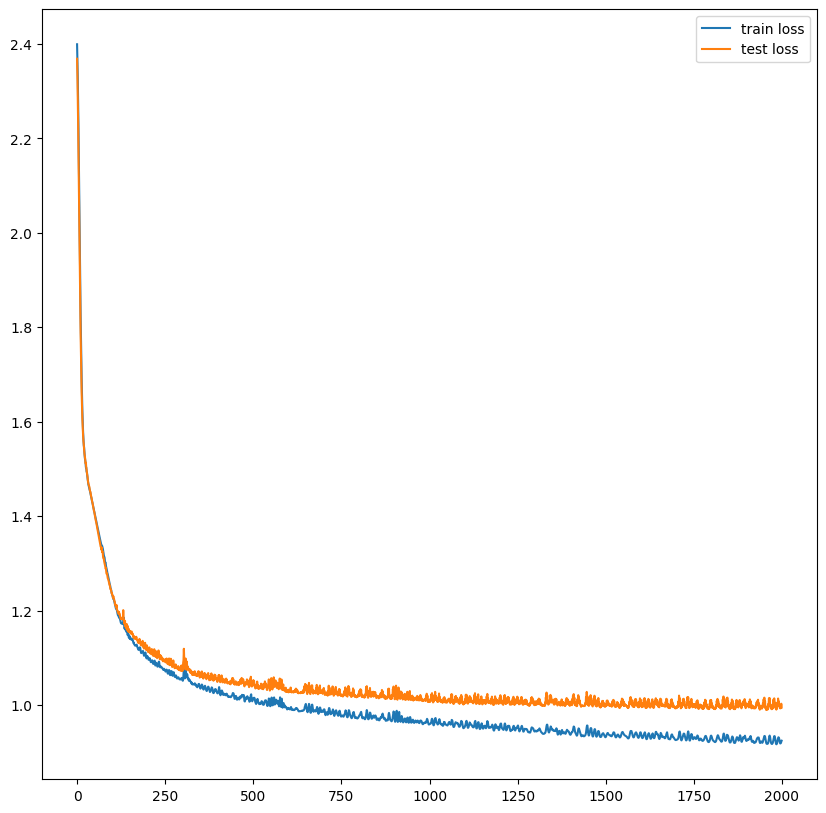

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [ ]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [ ]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [ ]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 56.938
Test Accuracy: 56.369


# 10-15 경계선##############